In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("/Users/zlochinus/Desktop/uni/bakalarka/xil-research-modification/src/caipi_experiment/control_lagrange_adam_200.csv")
df = df[['test_accuracy', 'train_accuracy', 'test_average_loss', 'train_average_loss', 'Lambda 0', 'Lambda accuracy 0']]

In [15]:
# omezeni
new_df = df[df['train_accuracy']]

KeyError: "None of [Index([0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n                      1.0, 0.9950248756218906,                1.0,\n       0.9950248756218906,                1.0, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906,                1.0, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906, 0.9950248756218906,\n                      1.0,                1.0,                1.0,\n                      1.0,                1.0,                1.0,\n                      1.0,                1.0,                1.0,\n                      1.0, 0.9950248756218906, 0.9950248756218906,\n       0.9950248756218906,                1.0, 0.9900497512437813,\n                      1.0,                1.0,                1.0,\n       0.9950248756218906,                1.0,                1.0,\n                      1.0, 0.9950248756218906, 0.9950248756218906,\n                      1.0,                1.0,                1.0,\n                      1.0, 0.9950248756218906,                1.0,\n       0.9950248756218906,                1.0, 0.9950248756218906,\n       0.9950248756218906, 0.9950248756218906,                1.0,\n                      1.0,                1.0,                1.0,\n                      1.0,                1.0,                1.0,\n       0.9950248756218906, 0.9950248756218906,                1.0,\n                      1.0,                1.0, 0.9950248756218906,\n       0.9950248756218906,                1.0,                1.0,\n                      1.0, 0.9950248756218906,                1.0,\n                      1.0],\n      dtype='float64')] are in the [columns]"

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   test_accuracy       100 non-null    float64
 1   train_accuracy      100 non-null    float64
 2   test_average_loss   100 non-null    float64
 3   train_average_loss  100 non-null    float64
 4   Lambda 0            100 non-null    float64
 5   Lambda accuracy 0   100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB


In [4]:
df.describe()

,test_accuracy,train_accuracy,test_average_loss,train_average_loss,Lambda 0,Lambda accuracy 0
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,0.583756,0.996667,1.153917,0.062553,2.688383e+08,0.412687
std,0.121920,0.002555,0.790128,0.080089,1.262928e+09,0.305240
min,0.497441,0.990050,0.213566,0.000004,1.000000e-10,0.000119
25%,0.497441,0.995025,0.539473,0.000042,1.018863e-05,0.126683
50%,0.511259,0.995025,0.651915,0.000570,1.027170e+00,0.450526
75%,0.666325,1.000000,1.806164,0.153898,1.022030e+05,0.592109
max,0.926305,1.000000,3.055871,0.210891,1.000000e+10,0.999968


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd

# Assuming your dataframe is called 'df'
# df = your_dataframe_here

def plot_lambda_accuracy_scatter(df, y_label, x_label, with_labels=True):
    """
    Creates a scatter plot of train_accuracy vs Lambda accuracy 0
    with logarithmic color scaling based on Lambda 0 values
    """
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Extract data
    x = df[x_label]
    y = df[y_label]
    colors = df['Lambda 0']
    
    # Create scatter plot with logarithmic color normalization
    scatter = ax.scatter(x, y, 
                        c=colors, 
                        cmap='coolwarm',  # Blue to red colormap
                        norm=LogNorm(vmin=colors.min(), vmax=colors.max()),
                        s=100,  # Size of points
                        alpha=0.8,  # Slight transparency
                        edgecolors='black',  # Black outline
                        linewidth=0.5)
    
    # Set axis limits with 0.05 offset
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    
    # Labels and title
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(f'{y_label} vs {x_label} (Color: Lambda 0)', fontsize=14, fontweight='bold')
    
    # Add colorbar with proper logarithmic scaling
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Lambda 0 (log scale)', fontsize=12)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3)
    
    if with_labels:
        for i, (xi, yi, lambda_val) in enumerate(zip(x, y, colors)):
            ax.text(xi, yi + 0.02, f'{lambda_val:.2e}', 
                    ha='center', va='bottom', fontsize=9, 
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
    
    # Ensure equal aspect ratio if desired
    # ax.set_aspect('equal')
    
    plt.tight_layout()
    return fig, ax

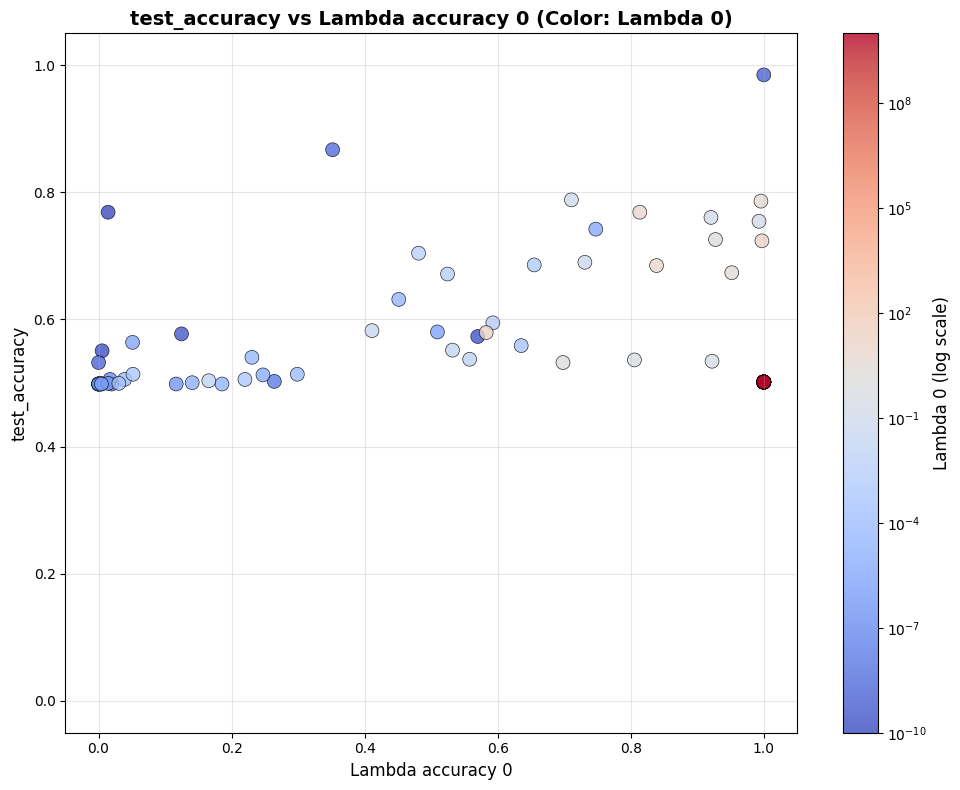

In [4]:

# Example usage:
y_label = 'test_accuracy'
x_label = 'Lambda accuracy 0'
fig, ax = plot_lambda_accuracy_scatter(df[df['test_accuracy'] > 0.1], y_label, x_label, False)
plt.show()


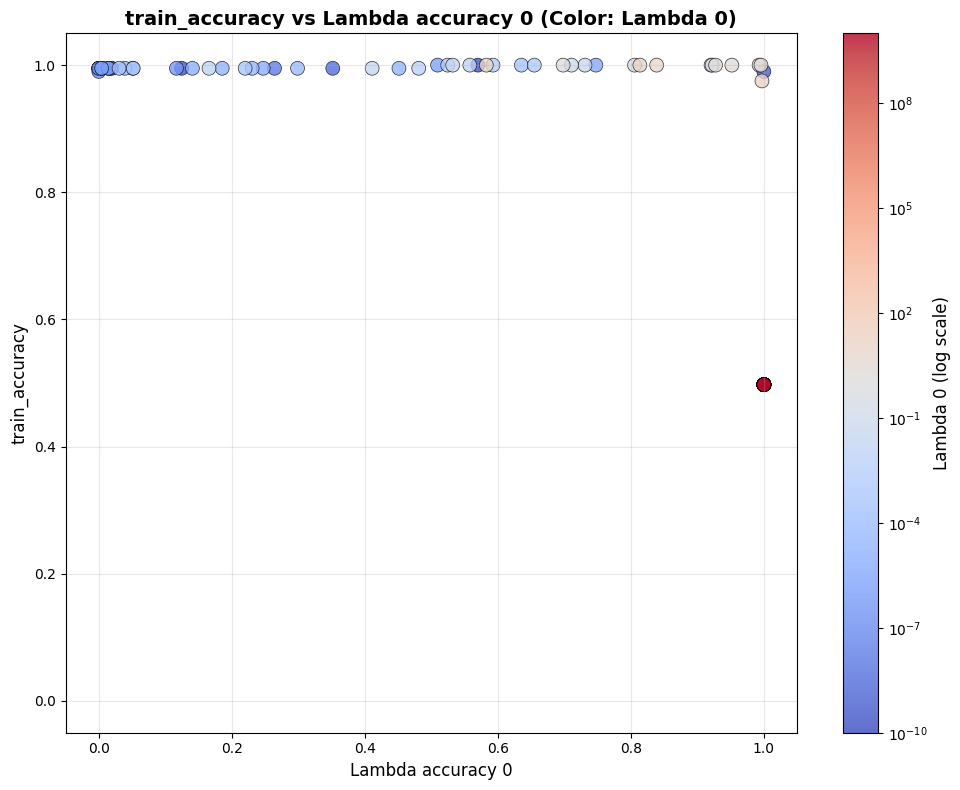

In [5]:

# Example usage:
y_label = 'train_accuracy'
x_label = 'Lambda accuracy 0'
fig, ax = plot_lambda_accuracy_scatter(df, y_label, x_label, False)
plt.show()


In [6]:

def plot_lambda0(df, y_label):
    """
    Creates a scatter plot of train_accuracy vs Lambda 0
    with logarithmic x-axis and logarithmic color scaling based on Lambda 0 values
    """
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Extract data
    x = df['Lambda 0']
    y = df[y_label]
    colors = df['Lambda 0']  # Same as x-axis for colorization
    
    # Create scatter plot with logarithmic color normalization
    scatter = ax.scatter(x, y, 
                        c=colors, 
                        cmap='coolwarm',  # Blue to red colormap
                        norm=LogNorm(vmin=colors.min(), vmax=colors.max()),
                        s=100,  # Size of points
                        alpha=0.8,  # Slight transparency
                        edgecolors='black',  # Black outline
                        linewidth=0.5)
    
    # Set logarithmic scale for x-axis
    ax.set_xscale('log')
    
    # Set y-axis limits with 0.05 offset
    ax.set_ylim(-0.05, 1.05)
    
    # Labels and title
    ax.set_xlabel('Lambda 0 (log scale)', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(f'{y_label} vs Lambda 0 (Color: Lambda 0)', fontsize=14, fontweight='bold')
    
    # Add colorbar with proper logarithmic scaling
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Lambda 0 (log scale)', fontsize=12)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3)
    
    for i, (xi, yi, lambda_val) in enumerate(zip(x, y, colors)):
        ax.text(xi, yi + 0.02, f'{lambda_val:.2e}',
                ha='center', va='bottom', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    return fig, ax

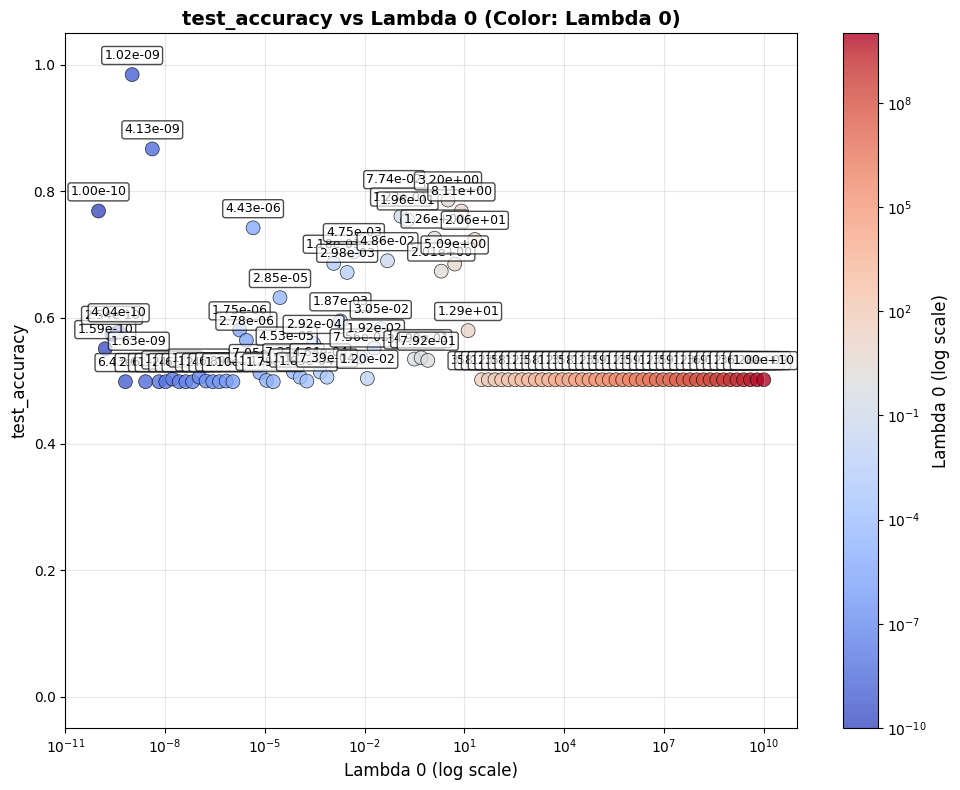

In [7]:

y_label = 'test_accuracy'
fig, ax = plot_lambda0(df[df['test_accuracy'] > 0.2], y_label)
plt.show()


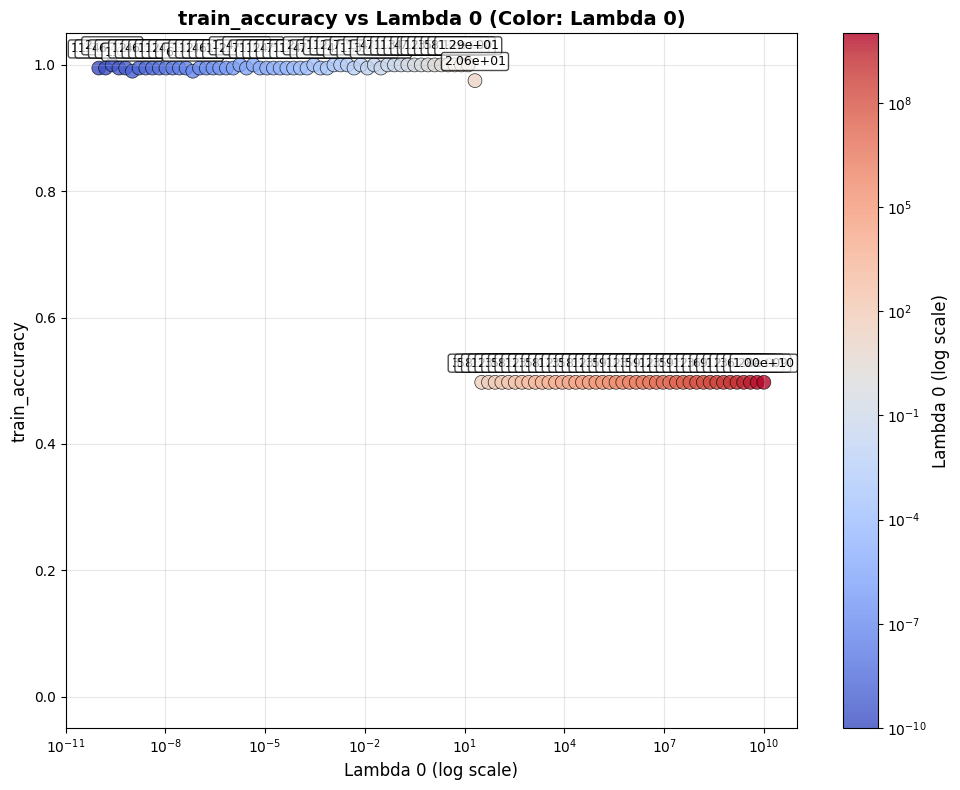

In [8]:

y_label = 'train_accuracy'
fig, ax = plot_lambda0(df[df['train_accuracy'] > 0.4], y_label)
plt.show()


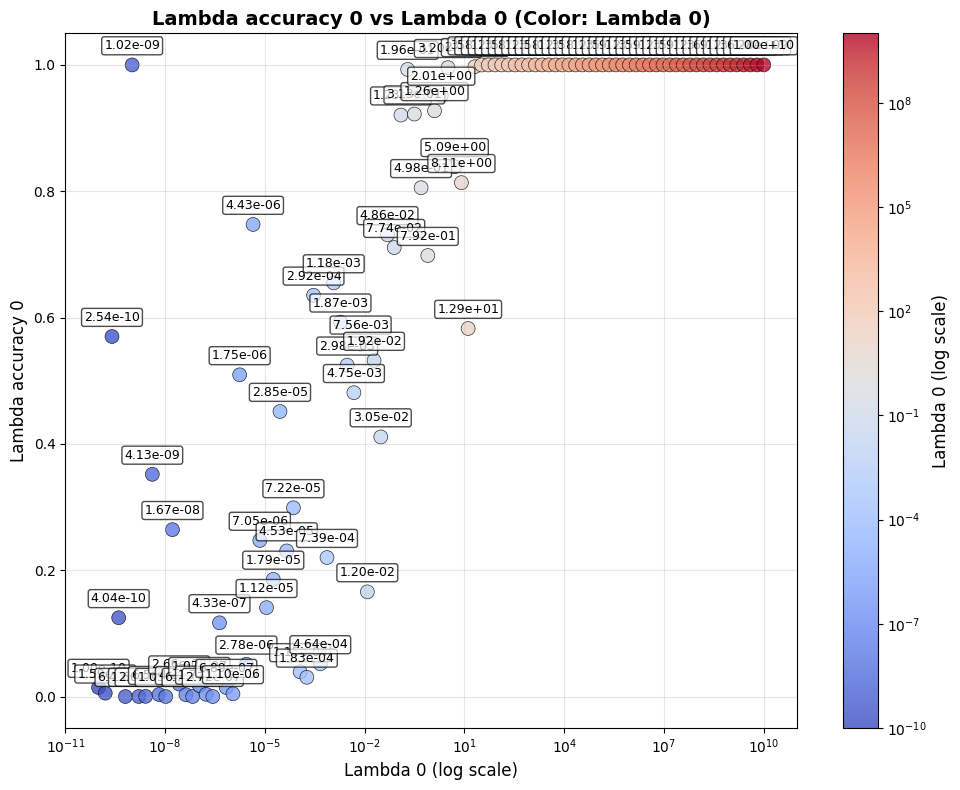

In [9]:
y_label = 'Lambda accuracy 0'
fig, ax = plot_lambda0(df[df['train_accuracy'] > 0.4], y_label)
plt.show()
